In [24]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np # to use numpy arrays instead of lists
import pandas as pd # DataFrame (table)
import matplotlib.pyplot as plt # to plot
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten,  GlobalAveragePooling1D, LSTM, Dropout

from google.colab import drive
drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [25]:
def leeDatos():

    dataSet = pd.read_csv("gdrive/MyDrive/Colab Notebooks/Amazon_Unlocked_Mobile.zip", header=0, compression='zip')

    return dataSet

In [26]:
def encodeData(dataSet=0):
    dataSet.dropna(inplace=True)

    # Remove any 'neutral' ratings equal to 3
    dataSet = dataSet[dataSet['Rating'] != 3]

    # Encode 4s and 5s as 1 (rated positively)
    # Encode 1s and 2s as 0 (rated poorly)
    dataSet['Positively Rated'] = np.where(dataSet['Rating'] > 3, 1, 0)
    datos = ['Reviews', 'Positively Rated']
    misDatos = dataSet[datos]
    misDatos = misDatos.iloc[0:5000,:]

    return misDatos

In [27]:
datos = leeDatos()
print(datos)
print("\n")

encodeDatos = encodeData(datos)
print(encodeDatos)
print("\n")
print(encodeDatos['Positively Rated'].mean())
print("\n")

                                             Product Name Brand Name   Price  \
0       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4       "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
...                                                   ...        ...     ...   
413835  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413836  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413837  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413838  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   
413839  Samsung Convoy U640 Phone for Verizon Wireless...    Samsung   79.95   

        Rating                         

In [28]:
ts_size = .25
trainSet, testSet = train_test_split(encodeDatos, test_size=ts_size, shuffle=False, random_state=0)
print(trainSet)
print('trainSet shape: ', trainSet.shape)
print(testSet)
print('testSet shape: ', testSet.shape)
print("\n")

                                                Reviews  Positively Rated
0     I feel so LUCKY to have found this used (phone...                 1
1     nice phone, nice up grade from my pantach revu...                 1
2                                          Very pleased                 1
3     It works good but it goes slow sometimes but i...                 1
4     Great phone to replace my lost phone. The only...                 1
...                                                 ...               ...
5680  It is very good and almost as good as new. The...                 1
5681  Bought from UnlockedCellPhoneKings refurbished...                 1
5682  I bought this iphone as "new" and when i recei...                 0
5683  I'm not too interested in having the latest te...                 1
5684  Product was brand new, and was factory unlocke...                 1

[3750 rows x 2 columns]
trainSet shape:  (3750, 2)
                                                Reviews  Pos

In [29]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

training_sentences= trainSet['Reviews']
training_labels = trainSet['Positively Rated']
testing_sentences = testSet['Reviews']
testing_labels = testSet['Positively Rated']

In [30]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [31]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [32]:
dropout_rate = 0.25
model = Sequential([
                    Embedding(vocab_size, embedding_dim, input_length=max_length),
                    #GlobalAveragePooling1D(),
                    LSTM(32, return_sequences = True),
                    Dropout(dropout_rate),
                    LSTM(16, return_sequences = True),
                    Dropout(dropout_rate),
                    LSTM(8),
                    Dropout(dropout_rate),
                    Dense(1, name="Outpul_layer")
                    ])

opt = 'adam'
loss_fun = 'binary_crossentropy'
acc = ['accuracy']

model.compile(
    optimizer = opt,
    loss = loss_fun,
    metrics = acc
    )

In [33]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Outpul_layer (Dense)                 │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
num_epochs = 30
history = model.fit(training_padded,
                    training_labels,
                    validation_split=0.1,
                    epochs=num_epochs,
                    verbose=2)

Epoch 1/30
106/106 - 23s - 219ms/step - accuracy: 0.4593 - loss: 1.3132 - val_accuracy: 0.6133 - val_loss: 0.6858
Epoch 2/30
106/106 - 11s - 106ms/step - accuracy: 0.5736 - loss: 0.7218 - val_accuracy: 0.6560 - val_loss: 0.6516
Epoch 3/30
106/106 - 20s - 187ms/step - accuracy: 0.6474 - loss: 0.6749 - val_accuracy: 0.6693 - val_loss: 0.6352
Epoch 4/30
106/106 - 22s - 206ms/step - accuracy: 0.6240 - loss: 0.6554 - val_accuracy: 0.6747 - val_loss: 0.6195
Epoch 5/30
106/106 - 20s - 188ms/step - accuracy: 0.6667 - loss: 0.6218 - val_accuracy: 0.6800 - val_loss: 0.6188
Epoch 6/30
106/106 - 11s - 105ms/step - accuracy: 0.6160 - loss: 0.6571 - val_accuracy: 0.6827 - val_loss: 0.6113
Epoch 7/30
106/106 - 12s - 110ms/step - accuracy: 0.6761 - loss: 0.6326 - val_accuracy: 0.6693 - val_loss: 1.0873
Epoch 8/30
106/106 - 19s - 176ms/step - accuracy: 0.5867 - loss: 1.7178 - val_accuracy: 0.6560 - val_loss: 0.6517
Epoch 9/30
106/106 - 11s - 104ms/step - accuracy: 0.5603 - loss: 0.7899 - val_accuracy: 

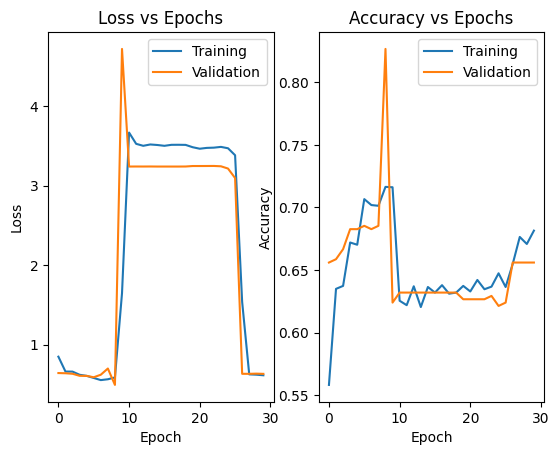

In [22]:
fig = plt.figure()
fig.add_subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss vs Epochs")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
fig.add_subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy vs Epochs")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [23]:
print(model.evaluate(training_padded, training_labels, verbose=2))
print("\n")

#### predict train data ######
df_train = pd.DataFrame()
df_train['pred'] = model.predict(training_padded).reshape(1,len(training_padded))[0]
df_train['real'] = training_labels
print(round(df_train))
print(model.evaluate(testing_padded,testing_labels, verbose=2))
print("\n")

# test data
df_test = pd.DataFrame()
df_test['pred'] = model.predict(testing_padded).reshape(1,len(testing_padded))[0]
df_test['real'] = testing_labels
print(round(df_test))

118/118 - 3s - 23ms/step - accuracy: 0.7040 - loss: 0.5923
[0.5923331379890442, 0.7039999961853027]


118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step
      pred  real
0      1.0     1
1      1.0     1
2      1.0     1
3      1.0     1
4      1.0     1
...    ...   ...
3745   1.0     1
3746   1.0     1
3747   1.0     0
3748   1.0     1
3749   1.0     1

[3750 rows x 2 columns]
40/40 - 1s - 27ms/step - accuracy: 0.6760 - loss: 0.6358
[0.635845959186554, 0.6759999990463257]


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
      pred  real
0      1.0     1
1      1.0     0
2      1.0     0
3      1.0     1
4      1.0     1
...    ...   ...
1245   1.0     0
1246   1.0     1
1247   1.0     0
1248   1.0     0
1249   1.0     1

[1250 rows x 2 columns]
